In [ ]:
import kagglehub
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [14]:
complaints_path = kagglehub.dataset_download('xiaomengsun/car-insurance-claim-data')
print(complaints_path)

C:\Users\adhit\.cache\kagglehub\datasets\xiaomengsun\car-insurance-claim-data\versions\1


C:\Users\adhit\AppData\Local\Temp\ipykernel_27672\795050719.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([f'{col_name}_binned', 'CLAIM_FLAG']).size().unstack(fill_value=0)
C:\Users\adhit\AppData\Local\Temp\ipykernel_27672\795050719.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([f'{col_name}_binned', 'CLAIM_FLAG']).size().unstack(fill_value=0)
C:\Users\adhit\AppData\Local\Temp\ipykernel_27672\795050719.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain c

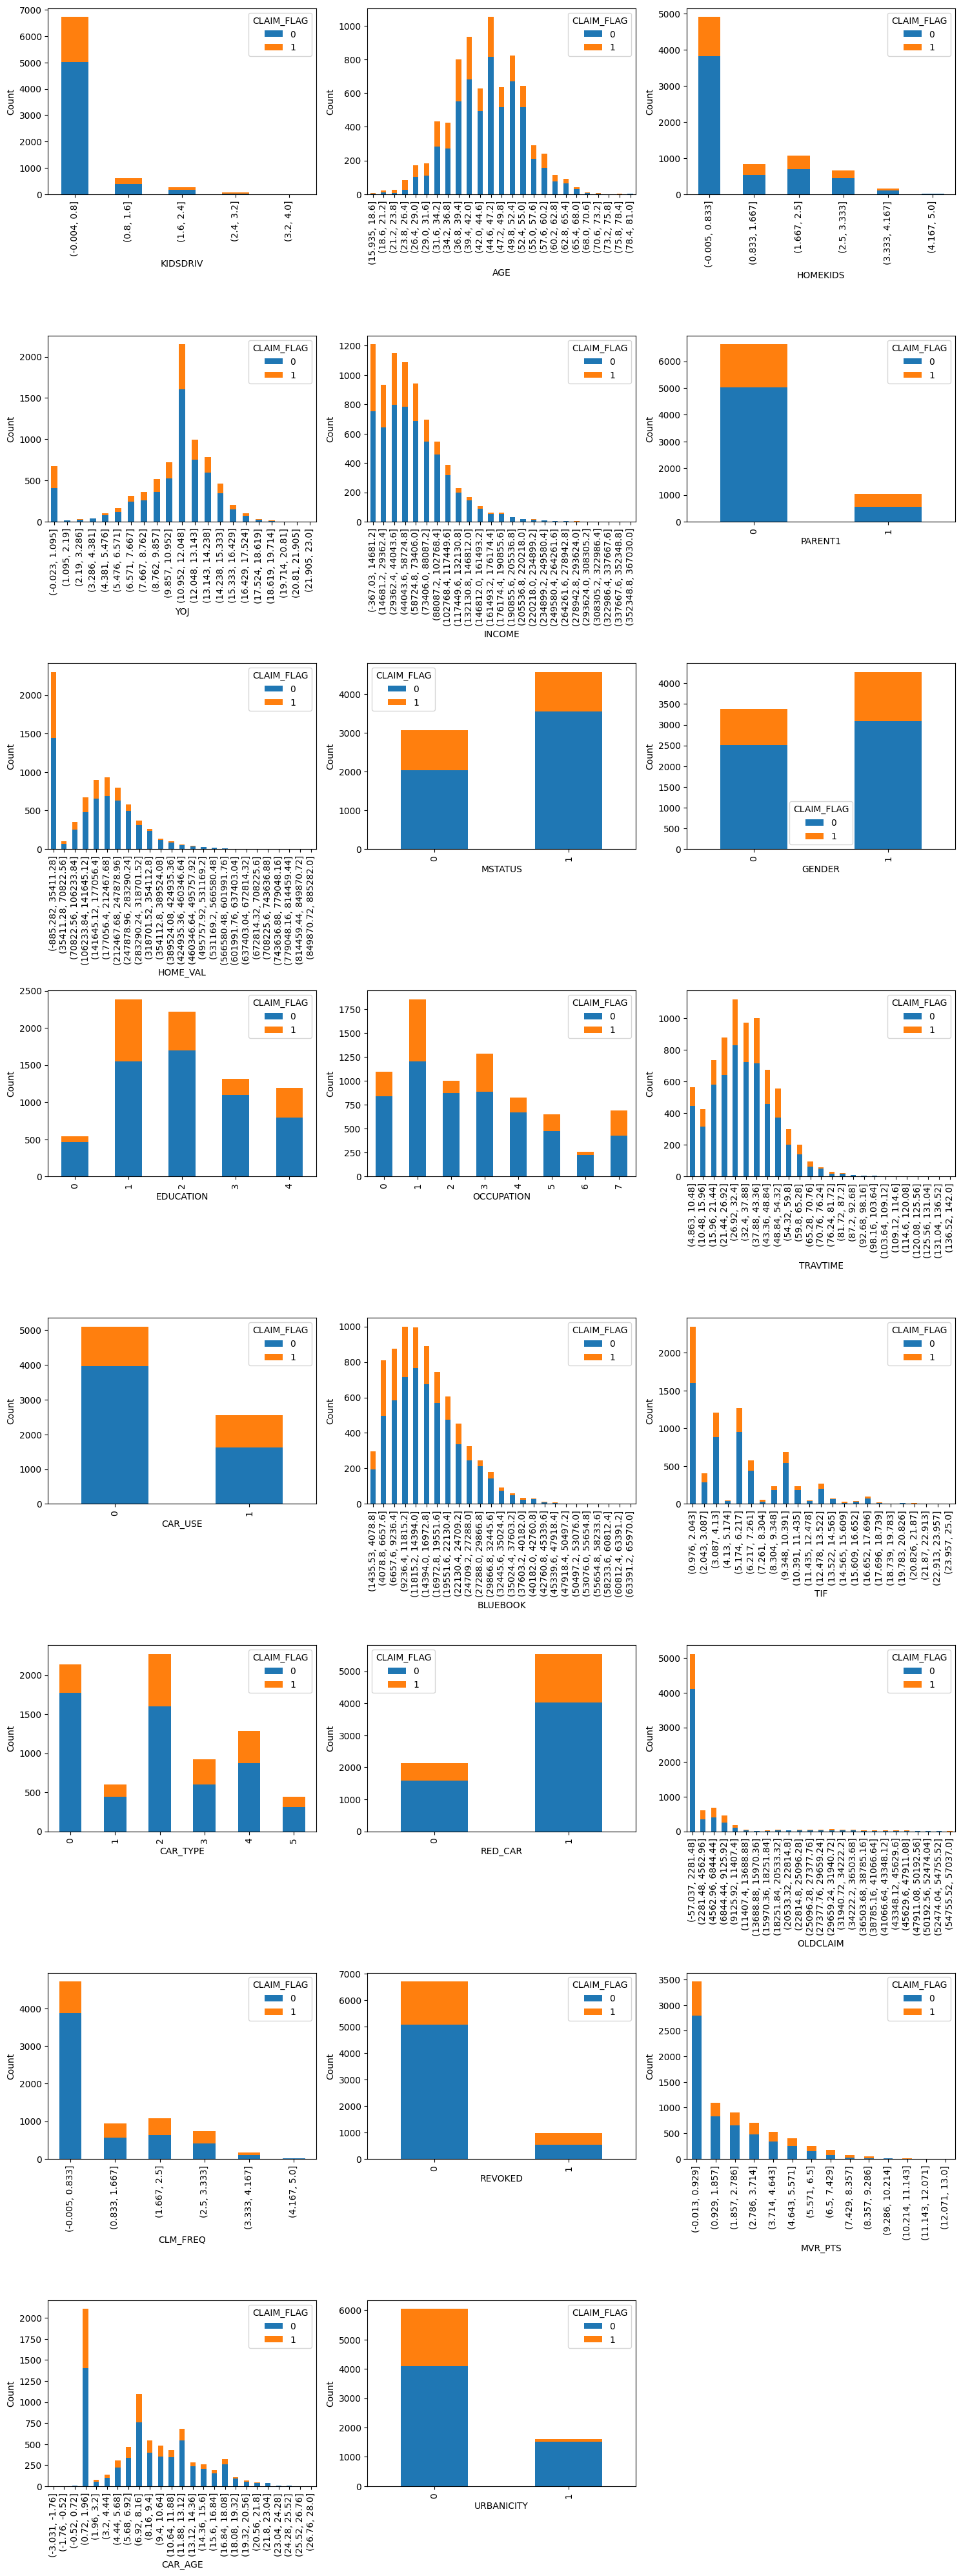

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def bin_numeric_column(column, bins=10):
    return pd.cut(column, bins=bins)

def cat_to_numeric_map(column: pd.Series):
    return {cat: i for i, cat in enumerate(column.unique())}

def money_to_numeric(column: pd.Series):
    return column.str.replace(r'\D', '', regex=True)

df = pd.read_csv('data/initial_claims.csv').dropna()

selected_cols = {
    'KIDSDRIV': {'dtype': 'numeric'},
    'AGE': {'dtype': 'numeric'},
    'HOMEKIDS': {'dtype': 'numeric'},
    'YOJ': {'dtype': 'numeric'},
    'INCOME': {'dtype': 'money'},
    'PARENT1': {'dtype': 'categorical'},
    'HOME_VAL': {'dtype': 'money'},
    'MSTATUS': {'dtype': 'categorical'},
    'GENDER': {'dtype': 'categorical'},
    'EDUCATION': {'dtype': 'categorical'},
    'OCCUPATION': {'dtype': 'categorical'},
    'TRAVTIME': {'dtype': 'numeric'},
    'CAR_USE': {'dtype': 'categorical'},
    'BLUEBOOK': {'dtype': 'money'},
    'TIF': {'dtype': 'numeric'},
    'CAR_TYPE': {'dtype': 'categorical'},
    'RED_CAR': {'dtype': 'categorical'},
    'OLDCLAIM': {'dtype': 'money'},
    'CLM_FREQ': {'dtype': 'numeric'},
    'REVOKED': {'dtype': 'categorical'},
    'MVR_PTS': {'dtype': 'numeric'},
    'CAR_AGE': {'dtype': 'numeric'},
    'URBANICITY': {'dtype': 'categorical'},
}

df = df.dropna()
for col_name, properties in selected_cols.items():
    if properties['dtype'] == 'money':
        df[col_name] = pd.to_numeric(money_to_numeric(df[col_name]), errors='coerce')
    elif properties['dtype'] == 'categorical':
        df[col_name] = df[col_name].map(cat_to_numeric_map(df[col_name]))

n_cols = 3
n_rows = len(selected_cols) // n_cols + 1
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
ax = ax.flatten()

for idx, col_name in enumerate(selected_cols):
    col_dtype = selected_cols[col_name]['dtype']
    if col_dtype in ['numeric', 'money']:
        df[f'{col_name}_binned'] = bin_numeric_column(df[col_name], bins=min(len(df[col_name].unique()), 25))
        counts = df.groupby([f'{col_name}_binned', 'CLAIM_FLAG']).size().unstack(fill_value=0)
    else:
        counts = df.groupby([col_name, 'CLAIM_FLAG']).size().unstack(fill_value=0)

    counts.plot(kind='bar', stacked=True, ax=ax[idx])
    ax[idx].set_xlabel(col_name)
    ax[idx].set_ylabel('Count')

for i in range(idx + 1, len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

cols = [ 'INCOME', 'AGE', 'TRAVTIME', 'CAR_AGE', 'URBANICITY', 'BLUEBOOK', 'MVR_PTS' ]

X = df[cols]
y = df['CLAIM_FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Logistic Regression Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Logistic Regression Model Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85      1111
           1       0.64      0.26      0.37       421

    accuracy                           0.76      1532
   macro avg       0.71      0.60      0.61      1532
weighted avg       0.74      0.76      0.72      1532

